In [134]:
# Importações de Bibliotecas Necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from datetime import timedelta  

In [150]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import regression, confusion_matrix
from sklearn.metrics import explained_variance_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
import seaborn as sns

In [154]:
# Load Generated Dataset (From DataGenerator_v5)
print("Reading CSV...")
df = pd.read_csv('generated_dataset_article_grouped_hour.csv', dayfirst=True, parse_dates=['timeFrom'], index_col='timeFrom')
print("Done!")
df

Reading CSV...
Done!


,isWeekday,isRain,isHoliday,TotalParkings,parking,region
timeFrom,,,,,,
2013-01-01 10:00:00,1,0,1,21,IPB,Cantina
2013-01-01 11:00:00,1,0,1,25,IPB,Cantina
2013-01-01 12:00:00,1,0,1,36,IPB,Cantina
2013-01-01 13:00:00,1,0,1,28,IPB,Cantina
2013-01-01 14:00:00,1,0,1,18,IPB,Cantina
...,...,...,...,...,...,...
2017-12-31 19:00:00,0,0,0,140,Bus Station,Main
2017-12-31 20:00:00,0,0,0,98,Bus Station,Main
2017-12-31 21:00:00,0,0,0,119,Bus Station,Main


In [155]:
# Split Important Time Variables 
df['hour'] = df.index.hour
#df['weekday'] = df.index.weekday
df['isRain'] = df['isRain'].astype('bool')
df['isHoliday'] = df['isHoliday'].astype('bool')
df['isWeekday'] = df['isWeekday'].astype('bool')
df['regpark'] = df['parking'] + ' - ' + df['region']

# Remove Unnecessary variables
df = df.drop(columns=['region','parking'])

# Show DataFrame
df

,isWeekday,isRain,isHoliday,TotalParkings,hour,regpark
timeFrom,,,,,,
2013-01-01 10:00:00,True,False,True,21,10,IPB - Cantina
2013-01-01 11:00:00,True,False,True,25,11,IPB - Cantina
2013-01-01 12:00:00,True,False,True,36,12,IPB - Cantina
2013-01-01 13:00:00,True,False,True,28,13,IPB - Cantina
2013-01-01 14:00:00,True,False,True,18,14,IPB - Cantina
...,...,...,...,...,...,...
2017-12-31 19:00:00,False,False,False,140,19,Bus Station - Main
2017-12-31 20:00:00,False,False,False,98,20,Bus Station - Main
2017-12-31 21:00:00,False,False,False,119,21,Bus Station - Main


In [156]:
# Filter just one Parking and Remove String Column
selected_parking = 'Bus Station - Main'

#df.reset_index()
#df = df.drop(columns=['timeFrom'])

df = df[df['regpark'] == selected_parking]
df = df.drop(columns=['regpark'])
df

,isWeekday,isRain,isHoliday,TotalParkings,hour
timeFrom,,,,,
2013-01-01 00:00:00,True,False,True,169,0
2013-01-01 01:00:00,True,False,True,185,1
2013-01-01 02:00:00,True,False,True,95,2
2013-01-01 03:00:00,True,False,True,54,3
2013-01-01 04:00:00,True,False,True,107,4
...,...,...,...,...,...
2017-12-31 19:00:00,False,False,False,140,19
2017-12-31 20:00:00,False,False,False,98,20
2017-12-31 21:00:00,False,False,False,119,21


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timeFrom       43824 non-null  datetime64[ns]
 1   isWeekday      43824 non-null  bool          
 2   isRain         43824 non-null  bool          
 3   isHoliday      43824 non-null  bool          
 4   TotalParkings  43824 non-null  int64         
 5   hour           43824 non-null  int64         
dtypes: bool(3), datetime64[ns](1), int64(2)
memory usage: 1.1 MB


,timeFrom,isWeekday,isRain,isHoliday,TotalParkings,hour
0,2013-01-01 00:00:00,True,False,True,169,0
1,2013-01-01 01:00:00,True,False,True,185,1
2,2013-01-01 02:00:00,True,False,True,95,2
3,2013-01-01 03:00:00,True,False,True,54,3
4,2013-01-01 04:00:00,True,False,True,107,4
...,...,...,...,...,...,...
43819,2017-12-31 19:00:00,False,False,False,140,19
43820,2017-12-31 20:00:00,False,False,False,98,20
43821,2017-12-31 21:00:00,False,False,False,119,21
43822,2017-12-31 22:00:00,False,False,False,185,22


In [78]:
from sklearn.model_selection import train_test_split

In [170]:
X = df.drop('TotalParkings', axis=1)
y = df['TotalParkings']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [173]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [174]:
predictions = dtree.predict(X_test)
predictions

array([102.91803279,  72.15151515, 103.97058824, ...,  35.20338983,
        66.38961039, 105.66666667])

In [175]:
# The best possible value 0, lower values are better.
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rmse

27.217500451467163

In [176]:
# The best possible score is 1.0, lower values are worse.
evs = explained_variance_score(y_test, predictions)
evs

0.5707801133667121

In [177]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [178]:
rfr_predictions = rfr.predict(X_test)

In [179]:
mse = mean_squared_error(y_test, rfr_predictions)
rmse = np.sqrt(mse)
rmse

26.901422283184843

In [180]:
# The best possible score is 1.0, lower values are worse.
evs = explained_variance_score(y_test, rfr_predictions)
evs

0.580691733834493

In [198]:
df_result = pd.DataFrame({"TotalParkings":y_test,"DecisionTree":predictions,"RandomForest":rfr_predictions})
#df_result = df_result.reset_index()
df_result = df_result.sort_values(by=['timeFrom'])

df_result

,TotalParkings,DecisionTree,RandomForest
timeFrom,,,
2013-01-01 00:00:00,169,100.000000,100.072258
2013-01-01 01:00:00,185,98.000000,96.898250
2013-01-01 02:00:00,95,43.000000,42.284204
2013-01-01 03:00:00,54,50.000000,49.628690
2013-01-01 04:00:00,107,58.000000,57.895786
...,...,...,...
2017-12-31 18:00:00,100,117.741935,117.339971
2017-12-31 19:00:00,140,109.600000,110.421583
2017-12-31 20:00:00,98,89.142857,88.815892


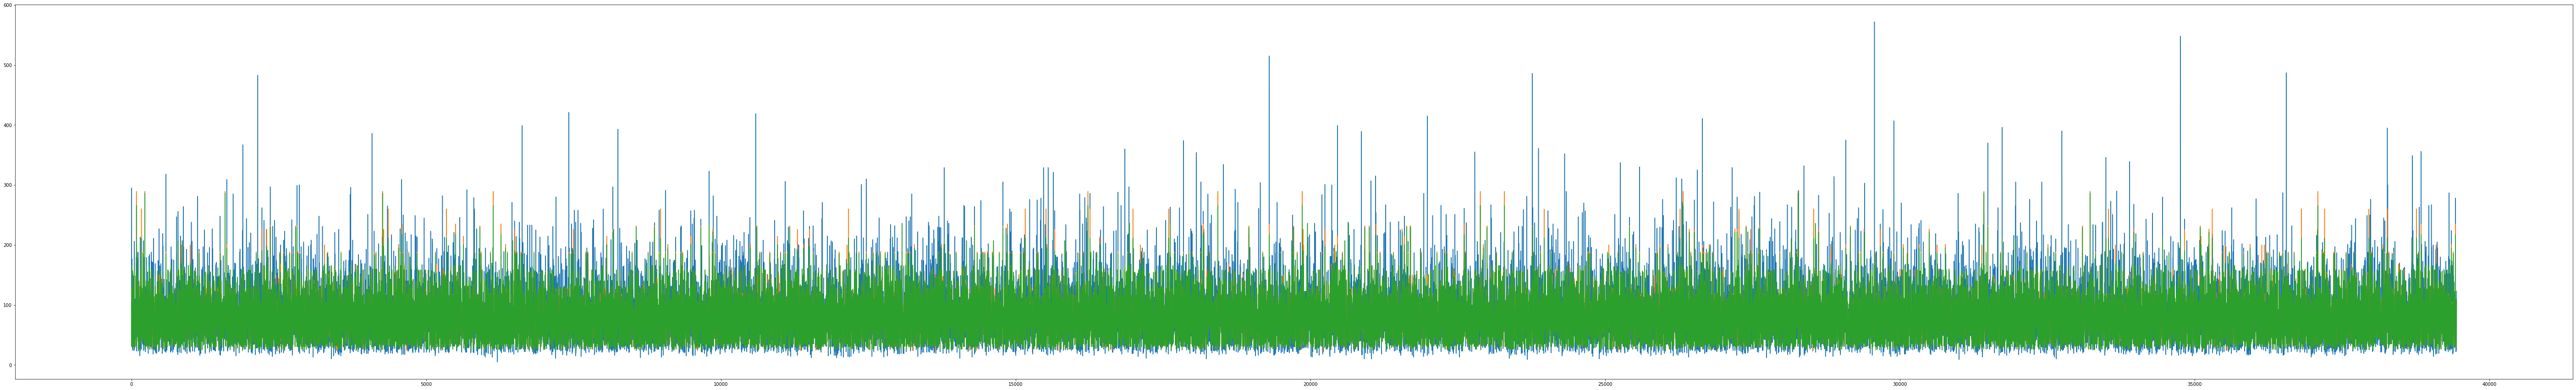

In [182]:
plt.figure(figsize=(100,15))
plt.plot(df_result.index, df_result.TotalParkings)
plt.plot(df_result.index, df_result.DecisionTree)
plt.plot(df_result.index, df_result.RandomForest)

In [199]:
print(int(len(df_result2)*0.9))

df_result2 = df_result.copy()
df_result2 = df_result2[int(len(df_result2)*0.9):]
df_result2

3550


,TotalParkings,DecisionTree,RandomForest
timeFrom,,,
2017-07-02 20:00:00,93,66.389610,66.524936
2017-07-02 21:00:00,61,71.492958,71.694720
2017-07-02 22:00:00,171,115.779412,115.648427
2017-07-02 23:00:00,35,26.307692,26.164846
2017-07-03 00:00:00,64,64.973333,64.661540
...,...,...,...
2017-12-31 18:00:00,100,117.741935,117.339971
2017-12-31 19:00:00,140,109.600000,110.421583
2017-12-31 20:00:00,98,89.142857,88.815892
